In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.interpolate import interp1d
from scipy.fft import rfft, irfft  

In [ ]:
#Cargamos los datos
pulse_data_1_200 = np.loadtxt("pictures/1_pulse_tfinal200_omegaC0.85_omega01.00.txt")
pulse_data_1_300 = np.loadtxt("pictures/1_pulse_tfinal300_omegaC0.85_omega01.00.txt")
pulse_data_2_200 = np.loadtxt("pictures/2_pulse_tfinal200_omegaC0.85_omega01.00.txt")
pulse_data_2_300 = np.loadtxt("pictures/2_pulse_tfinal300_omegaC0.85_omega01.00.txt")
pulse_data_3_200 = np.loadtxt("pictures/3_pulse_tfinal200_omegaC0.85_omega01.00.txt")
pulse_data_3_300 = np.loadtxt("pictures/3_pulse_tfinal300_omegaC0.85_omega01.00.txt")
pulse_data_4_200 = np.loadtxt("pictures/4_pulse_tfinal200_omegaC0.85_omega01.00.txt")
pulse_data_4_300 = np.loadtxt("pictures/4_pulse_tfinal300_omegaC0.85_omega01.00.txt")

#Extraemos los datos para cada conjunto de datos
t_data_1_200 = pulse_data_1_200[:, 0]
y_data_1_200 = pulse_data_1_200[:, 1]
N_points_1_200 = len(y_data_1_200)
T_duration_1_200 = t_data_1_200[-1] - t_data_1_200[0] # Duración total (250 fs)
omega_1_200 = 2 * np.pi / T_duration_1_200

t_data_1_300 = pulse_data_1_300[:, 0]
y_data_1_300 = pulse_data_1_300[:, 1]
N_points_1_300 = len(y_data_1_300)
T_duration_1_300 = t_data_1_300[-1] - t_data_1_300[0] # Duración total (300 fs)
omega_1_300 = 2 * np.pi / T_duration_1_300

t_data_2_200 = pulse_data_2_200[:, 0]
y_data_2_200 = pulse_data_2_200[:, 1]
N_points_2_200 = len(y_data_2_200)
T_duration_2_200 = t_data_2_200[-1] - t_data_2_200[0] # Duración total (250 fs)
omega_2_200 = 2 * np.pi / T_duration_2_200  

t_data_2_300 = pulse_data_2_300[:, 0]
y_data_2_300 = pulse_data_2_300[:, 1]
N_points_2_300 = len(y_data_2_300)
T_duration_2_300 = t_data_2_300[-1] - t_data_2_300[0] # Duración total (300 fs)
omega_2_300 = 2 * np.pi / T_duration_2_300

t_data_3_200 = pulse_data_3_200[:, 0]
y_data_3_200 = pulse_data_3_200[:, 1]
N_points_3_200 = len(y_data_3_200)
T_duration_3_200 = t_data_3_200[-1] - t_data_3_200[0] # Duración total (250 fs)
omega_3_200 = 2 * np.pi / T_duration_3_200

t_data_3_300 = pulse_data_3_300[:, 0]
y_data_3_300 = pulse_data_3_300[:, 1]
N_points_3_300 = len(y_data_3_300)
T_duration_3_300 = t_data_3_300[-1] - t_data_3_300[0] # Duración total (300 fs)
omega_3_300 = 2 * np.pi / T_duration_3_300

t_data_4_200 = pulse_data_4_200[:, 0]
y_data_4_200 = pulse_data_4_200[:, 1]
N_points_4_200 = len(y_data_4_200)
T_duration_4_200 = t_data_4_200[-1] - t_data_4_200[0] # Duración total (250 fs)
omega_4_200 = 2 * np.pi / T_duration_4_200

t_data_4_300 = pulse_data_4_300[:, 0]
y_data_4_300 = pulse_data_4_300[:, 1]
N_points_4_300 = len(y_data_4_300)
T_duration_4_300 = t_data_4_300[-1] - t_data_4_300[0] # Duración total (300 fs)
omega_4_300 = 2 * np.pi / T_duration_4_300



# Calcular TODOS los coeficientes FFT para cada conjunto de datos
coeffs_fft_1_200 = rfft(y_data_1_200)
coeffs_fft_1_300 = rfft(y_data_1_300)
coeffs_fft_2_200 = rfft(y_data_2_200)
coeffs_fft_2_300 = rfft(y_data_2_300)
coeffs_fft_3_200 = rfft(y_data_3_200)
coeffs_fft_3_300 = rfft(y_data_3_300)
coeffs_fft_4_200 = rfft(y_data_4_200)
coeffs_fft_4_300 = rfft(y_data_4_300)

# ¿Cuántos términos queremos para cada conjunto de datos?
N_terminos_deseados_1_200 = 3
N_terminos_deseados_1_300 = 3
N_terminos_deseados_2_200 = 3
N_terminos_deseados_2_300 = 3
N_terminos_deseados_3_200 = 3
N_terminos_deseados_3_300 = 3
N_terminos_deseados_4_200 = 3
N_terminos_deseados_4_300 = 3

# 1. Calcular la magnitud de cada coeficiente
#    La magnitud nos dice la "importancia" de cada frecuencia
magnitudes_1_200 = np.abs(coeffs_fft_1_200)
magnitudes_1_300 = np.abs(coeffs_fft_1_300)
magnitudes_2_200 = np.abs(coeffs_fft_2_200)
magnitudes_2_300 = np.abs(coeffs_fft_2_300)
magnitudes_3_200 = np.abs(coeffs_fft_3_200)
magnitudes_3_300 = np.abs(coeffs_fft_3_300)
magnitudes_4_200 = np.abs(coeffs_fft_4_200)
magnitudes_4_300 = np.abs(coeffs_fft_4_300)

# 2. Obtener los ÍNDICES que ordenarían el array (de menor a mayor)
indices_ordenados_1_200 = np.argsort(magnitudes_1_200)
indices_ordenados_1_300 = np.argsort(magnitudes_1_300)
indices_ordenados_2_200 = np.argsort(magnitudes_2_200)
indices_ordenados_2_300 = np.argsort(magnitudes_2_300)
indices_ordenados_3_200 = np.argsort(magnitudes_3_200)
indices_ordenados_3_300 = np.argsort(magnitudes_3_300)
indices_ordenados_4_200 = np.argsort(magnitudes_4_200)
indices_ordenados_4_300 = np.argsort(magnitudes_4_300)

# 3. Quedarnos con los N últimos índices (los de mayor magnitud)
indices_top_N_1_200 = indices_ordenados_1_200[-N_terminos_deseados_1_200:]

print(f"Los {N_terminos_deseados_1_200} índices (n) más importantes (con mayor magnitud) para 1_200:")
print(f"n = {np.sort(indices_top_N_1_200)}") # Los ordenamos para verlos mejor
print("---")
indices_top_N_1_300 = indices_ordenados_1_300[-N_terminos_deseados_1_300:]
print(f"Los {N_terminos_deseados_1_300} índices (n) más importantes (con mayor magnitud) para 1_300:")
print(f"n = {np.sort(indices_top_N_1_300)}") # Los ordenamos para verlos mejor
print("---")
indices_top_N_2_200 = indices_ordenados_2_200[-N_terminos_deseados_2_200:]
print(f"Los {N_terminos_deseados_2_200} índices (n) más importantes (con mayor magnitud) para 2_200:")
print(f"n = {np.sort(indices_top_N_2_200)}") # Los ordenamos para verlos mejor
print("---")
indices_top_N_2_300 = indices_ordenados_2_300[-N_terminos_deseados_2_300:]
print(f"Los {N_terminos_deseados_2_300} índices (n) más importantes (con mayor magnitud) para 2_300:")
print(f"n = {np.sort(indices_top_N_2_300)}") # Los ordenamos para verlos mejor
print("---")
indices_top_N_3_200 = indices_ordenados_3_200[-N_terminos_deseados_3_200:]
print(f"Los {N_terminos_deseados_3_200} índices (n) más importantes (con mayor magnitud) para 3_200:")
print(f"n = {np.sort(indices_top_N_3_200)}") # Los ordenamos para verlos mejor
print("---")
indices_top_N_3_300 = indices_ordenados_3_300[-N_terminos_deseados_3_300:]
print(f"Los {N_terminos_deseados_3_300} índices (n) más importantes (con mayor magnitud) para 3_300:")
print(f"n = {np.sort(indices_top_N_3_300)}") # Los ordenamos para verlos mejor
print("---")
indices_top_N_4_200 = indices_ordenados_4_200[-N_terminos_deseados_4_200:]
print(f"Los {N_terminos_deseados_4_200} índices (n) más importantes (con mayor magnitud) para 4_200:")
print(f"n = {np.sort(indices_top_N_4_200)}") # Los ordenamos para verlos mejor
print("---")
indices_top_N_4_300 = indices_ordenados_4_300[-N_terminos_deseados_4_300:]
print(f"Los {N_terminos_deseados_4_300} índices (n) más importantes (con mayor magnitud) para 4_300:")
print(f"n = {np.sort(indices_top_N_4_300)}") # Los ordenamos para verlos mejor
print("---")


# 4. Crear un array de coeficientes filtrado (todo ceros)
coeffs_filtrados_top_N_1_200 = np.zeros_like(coeffs_fft_1_200)
coeffs_filtrados_top_N_1_300 = np.zeros_like(coeffs_fft_1_300)
coeffs_filtrados_top_N_2_200 = np.zeros_like(coeffs_fft_2_200)
coeffs_filtrados_top_N_2_300 = np.zeros_like(coeffs_fft_2_300)
coeffs_filtrados_top_N_3_200 = np.zeros_like(coeffs_fft_3_200)
coeffs_filtrados_top_N_3_300 = np.zeros_like(coeffs_fft_3_300)
coeffs_filtrados_top_N_4_200 = np.zeros_like(coeffs_fft_4_200)
coeffs_filtrados_top_N_4_300 = np.zeros_like(coeffs_fft_4_300)

# 5. Copiar SOLO los coeficientes más importantes al array
coeffs_filtrados_top_N_1_200[indices_top_N_1_200] = coeffs_fft_1_200[indices_top_N_1_200]
coeffs_filtrados_top_N_1_300[indices_top_N_1_300] = coeffs_fft_1_300[indices_top_N_1_300]
coeffs_filtrados_top_N_2_200[indices_top_N_2_200] = coeffs_fft_2_200[indices_top_N_2_200]
coeffs_filtrados_top_N_2_300[indices_top_N_2_300] = coeffs_fft_2_300[indices_top_N_2_300]
coeffs_filtrados_top_N_3_200[indices_top_N_3_200] = coeffs_fft_3_200[indices_top_N_3_200]
coeffs_filtrados_top_N_3_300[indices_top_N_3_300] = coeffs_fft_3_300[indices_top_N_3_300]
coeffs_filtrados_top_N_4_200[indices_top_N_4_200] = coeffs_fft_4_200[indices_top_N_4_200]
coeffs_filtrados_top_N_4_300[indices_top_N_4_300] = coeffs_fft_4_300[indices_top_N_4_300]

# 6. Reconstruir la señal usando solo esos N términos
pulse_fit_top_N_1_200 = irfft(coeffs_filtrados_top_N_1_200, n=N_points_1_200)
pulse_fit_top_N_1_300 = irfft(coeffs_filtrados_top_N_1_300, n=N_points_1_300)
pulse_fit_top_N_2_200 = irfft(coeffs_filtrados_top_N_2_200, n=N_points_2_200)
pulse_fit_top_N_2_300 = irfft(coeffs_filtrados_top_N_2_300, n=N_points_2_300)
pulse_fit_top_N_3_200 = irfft(coeffs_filtrados_top_N_3_200, n=N_points_3_200)
pulse_fit_top_N_3_300 = irfft(coeffs_filtrados_top_N_3_300, n=N_points_3_300)
pulse_fit_top_N_4_200 = irfft(coeffs_filtrados_top_N_4_200, n=N_points_4_200)
pulse_fit_top_N_4_300 = irfft(coeffs_filtrados_top_N_4_300, n=N_points_4_300)

# --- 3. (PARA COMPARAR) Reconstrucción con el método antiguo (Primeros N) ---
coeffs_filtrados_primeros_N_1_200 = np.zeros_like(coeffs_fft_1_200)
coeffs_filtrados_primeros_N_1_200[:N_terminos_deseados_1_200] = coeffs_fft_1_200[:N_terminos_deseados_1_200]
pulse_fit_primeros_N_1_200 = irfft(coeffs_filtrados_primeros_N_1_200, n=N_points_1_200)

coeffs_filtrados_primeros_N_1_300 = np.zeros_like(coeffs_fft_1_300)
coeffs_filtrados_primeros_N_1_300[:N_terminos_deseados_1_300] = coeffs_fft_1_300[:N_terminos_deseados_1_300]
pulse_fit_primeros_N_1_300 = irfft(coeffs_filtrados_primeros_N_1_300, n=N_points_1_300)

coeffs_filtrados_primeros_N_2_200 = np.zeros_like(coeffs_fft_2_200)
coeffs_filtrados_primeros_N_2_200[:N_terminos_deseados_2_200] = coeffs_fft_2_200[:N_terminos_deseados_2_200]
pulse_fit_primeros_N_2_200 = irfft(coeffs_filtrados_primeros_N_2_200, n=N_points_2_200)

coeffs_filtrados_primeros_N_2_300 = np.zeros_like(coeffs_fft_2_300)
coeffs_filtrados_primeros_N_2_300[:N_terminos_deseados_2_300] = coeffs_fft_2_300[:N_terminos_deseados_2_300]
pulse_fit_primeros_N_2_300 = irfft(coeffs_filtrados_primeros_N_2_300, n=N_points_2_300) 

coeffs_filtrados_primeros_N_3_200 = np.zeros_like(coeffs_fft_3_200)
coeffs_filtrados_primeros_N_3_200[:N_terminos_deseados_3_200] = coeffs_fft_3_200[:N_terminos_deseados_3_200]
pulse_fit_primeros_N_3_200 = irfft(coeffs_filtrados_primeros_N_3_200, n=N_points_3_200) 

coeffs_filtrados_primeros_N_3_300 = np.zeros_like(coeffs_fft_3_300)
coeffs_filtrados_primeros_N_3_300[:N_terminos_deseados_3_300] = coeffs_fft_3_300[:N_terminos_deseados_3_300]
pulse_fit_primeros_N_3_300 = irfft(coeffs_filtrados_primeros_N_3_300, n=N_points_3_300)

coeffs_filtrados_primeros_N_4_200 = np.zeros_like(coeffs_fft_4_200)
coeffs_filtrados_primeros_N_4_200[:N_terminos_deseados_4_200] = coeffs_fft_4_200[:N_terminos_deseados_4_200]
pulse_fit_primeros_N_4_200 = irfft(coeffs_filtrados_primeros_N_4_200, n=N_points_4_200)

coeffs_filtrados_primeros_N_4_300 = np.zeros_like(coeffs_fft_4_300)
coeffs_filtrados_primeros_N_4_300[:N_terminos_deseados_4_300] = coeffs_fft_4_300[:N_terminos_deseados_4_300]
pulse_fit_primeros_N_4_300 = irfft(coeffs_filtrados_primeros_N_4_300, n=N_points_4_300)

Los 3 índices (n) más importantes (con mayor magnitud) para 1_200:
n = [12 13 14]
---
Los 3 índices (n) más importantes (con mayor magnitud) para 1_300:
n = [18 19 20]
---
Los 3 índices (n) más importantes (con mayor magnitud) para 2_200:
n = [12 13 14]
---
Los 3 índices (n) más importantes (con mayor magnitud) para 2_300:
n = [18 19 20]
---
Los 3 índices (n) más importantes (con mayor magnitud) para 3_200:
n = [12 13 14]
---
Los 3 índices (n) más importantes (con mayor magnitud) para 3_300:
n = [18 19 20]
---
Los 3 índices (n) más importantes (con mayor magnitud) para 4_200:
n = [12 13 14]
---
Los 3 índices (n) más importantes (con mayor magnitud) para 4_300:
n = [18 19 20]
---


In [ ]:
# ==============================================================================
# 1. Constantes Físicas y de Simulación (Definidas una vez)
# ==============================================================================

# Factores de conversión
AU_CM1 = 2.1947463137e5
AU_FS = 0.02418884326505

# Frecuencias base (a.u.)
omega_0 = 2500 / AU_CM1
omega_c = 0.85 * omega_0 

# --- Parámetros para Hamiltoniano Tipo 1 y 3 ---
g = 0.05 * omega_c   # Acoplamiento
U_b = 0.003 * omega_c # Anarmonicidad

# --- Parámetros para Hamiltoniano Tipo 2 ---
E0 = 2.0 * omega_c  # Amplitud del campo eléctrico
d1 = 0.025          # Coeficiente dipolar de primer orden
d2 = 0.00026        # Coeficiente dipolar de segundo orden

# Dimensiones del espacio de Hilbert
N1, N2 = 31, 31

# Operadores (Definidos una vez)
a = tensor(destroy(N1), qeye(N2))
b = tensor(qeye(N1), destroy(N2))
x_a = a.dag() + a
x_b = b.dag() + b

# Operadores de expectación (comunes a todas las simulaciones)
e_ops = [
    a.dag() * a,          # 0: n_cavity
    b.dag() * b,          # 1: n_molecular
    a,                    # 2
    a.dag(),              # 3
    b,                    # 4
    b.dag(),              # 5
    a * b.dag(),          # 6
    a.dag() * b.dag(),    # 7
    a.dag() * b,          # 8
    a * b,                # 9
    a**2,                 # 10
    a.dag()**2,           # 11
    b**2,                 # 12
    b.dag()**2,           # 13
    a.dag() * a * a.dag() * a # 14: (n_cavity)^2
]

# Opciones del solver
options_qutip = Options(atol=1e-9)

# ==============================================================================
# 2. Funciones de Ayuda
# ==============================================================================

def get_top_n_fft_fit(y_data, n_terms=3):
    """
    Toma una señal y_data y devuelve una reconstrucción de 'n_terms'
    basada en los coeficientes FFT de mayor magnitud.
    """
    N_points = len(y_data)
    coeffs_fft = rfft(y_data)
    
    # 1. Encontrar magnitudes
    magnitudes = np.abs(coeffs_fft)
    
    # 2. Obtener índices de las N mayores magnitudes
    indices_ordenados = np.argsort(magnitudes)
    indices_top_N = indices_ordenados[-n_terms:]
    
    # 3. Filtrar coeficientes
    coeffs_filtrados = np.zeros_like(coeffs_fft)
    coeffs_filtrados[indices_top_N] = coeffs_fft[indices_top_N]
    
    # 4. Reconstruir la señal
    pulse_fit = irfft(coeffs_filtrados, n=N_points)
    
    return pulse_fit

def run_simulation(t_data_fs_original, y_data_pulse_original, hamiltonian_type):
    """
    Ejecuta la simulación de QuTiP para un pulso dado, extendiéndolo
    primero con 100 fs de ceros y seleccionando el Hamiltoniano correcto.
    """
    
    # --- 1. Modificación: Extender el pulso con 100 fs de ceros ---
    t_pulse_end_fs = t_data_fs_original[-1]
    t_sim_end_fs = t_pulse_end_fs + 100.0
    
    # Calcular pasos para el padding
    dt = t_data_fs_original[1] - t_data_fs_original[0] # paso de tiempo
    n_padding_steps = int(np.round(100.0 / dt))
    
    # Crear los arrays de padding
    t_padding = np.linspace(t_pulse_end_fs + dt, t_sim_end_fs, n_padding_steps)
    y_padding = np.zeros(n_padding_steps)
    
    # Concatenar los datos originales con el padding
    t_data_padded = np.concatenate((t_data_fs_original, t_padding))
    y_data_padded = np.concatenate((y_data_pulse_original, y_padding))
    
    # 2. Crear el interpolador del pulso (ahora con padding)
    f_interp_fs_to_au = interp1d(
        t_data_padded, 
        y_data_padded, 
        kind='linear', 
        bounds_error=False, 
        fill_value=0.0
    )

    # 3. Crear la función de pulso para QuTiP
    def f_t_qutip(t, args):
        t_en_femtosegundos = t * AU_FS
        return f_interp_fs_to_au(t_en_femtosegundos).item()

    # 4. Crear el tlist para la simulación (es el tiempo del pulso con padding)
    t_eval_fs = t_data_padded
    t_eval_au = t_eval_fs / AU_FS

    # --- 5. Modificación: Seleccionar Hamiltoniano ---
    H_sys = omega_c * a.dag() * a + omega_0 * b.dag() * b
    
    if hamiltonian_type == 'type_1':
        H_anharmonic =0
        H_int = g * x_a * x_b
        H0 = H_sys + H_anharmonic + H_int
        H_drive_op_local = x_a
    
    elif hamiltonian_type == 'type_2':
        H_int1 = E0 * d1 * x_a * x_b
        H_int2 = E0 * d2 * x_a * (x_b * x_b)
        H0 = H_sys + H_int1 + H_int2
        H_drive_op_local = x_a # H_drive es x_a

    elif hamiltonian_type == 'type_3':
        H_anharmonic = -U_b * b.dag() * b.dag() * b * b
        H_int = g * x_a * x_b
        H0 = H_sys + H_anharmonic + H_int
        H_drive_op_local = x_a
    
    elif hamiltonian_type == 'type_4':
        H_anharmonic = -U_b * b.dag() * b.dag() * b * b
        H_int1 = E0 * d1 * x_a * x_b
        H_int2 = E0 * d2 * x_a * (x_b * x_b)
        H0 = H_sys + H_anharmonic + H_int1 + H_int2
        H_drive_op_local = x_a # H_drive es x_a
    else:
        raise ValueError(f"Hamiltonian type '{hamiltonian_type}' not recognized.")

    # Definir el Hamiltoniano dependiente del tiempo
    H = [H0, [H_drive_op_local, f_t_qutip]]

    # 6. Ejecutar la simulación
    psi0 = tensor(basis(N1, 0), basis(N2, 0)) # Estado inicial |0>|0>
    result = mesolve(H, psi0, t_eval_au, [], e_ops, options=options_qutip)
    
    # 7. Calcular el Factor de Mandel Q
    n_cavity = np.array(result.expect[0])
    n_cavity_squared = np.array(result.expect[14])
    
    Q_cavity = (n_cavity_squared - n_cavity**2 - n_cavity) / n_cavity
    Q_cavity = np.nan_to_num(Q_cavity, nan=0.0) # Evitar NaN en t=0

    # Devolvemos el array de tiempo extendido (con padding) y el Q
    return t_eval_fs, Q_cavity

# ==============================================================================
# 3. Configuración de los 6 Conjuntos de Datos
# ==============================================================================

config_datasets = [
    {
        'label': 'Pulse 1 (T=200 fs)',
        'file': 'pictures_poster/1_pulse_tfinal200_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_1' # Tipo 1
    },
    {
        'label': 'Pulse 2 (T=200 fs)',
        'file': 'pictures_poster/2_pulse_tfinal200_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_2' # Tipo 2
    },
    {
        'label': 'Pulse 3 (T=200 fs)',
        'file': 'pictures_poster/3_pulse_tfinal200_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_3' # Tipo 3 (usa H de Tipo 1)
    },
    {
        'label': 'Pulse 4 (T=200 fs)',
        'file': 'pictures_poster/4_pulse_tfinal200_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_4' # Tipo 4
    },
    {
        'label': 'Pulse 1 (T=300 fs)',
        'file': 'pictures_poster/1_pulse_tfinal300_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_1' # Tipo 1
    },
    {
        'label': 'Pulse 2 (T=300 fs)',
        'file': 'pictures_poster/2_pulse_tfinal300_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_2' # Tipo 2
    },
    {
        'label': 'Pulse 3 (T=300 fs)',
        'file': 'pictures_poster/3_pulse_tfinal300_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_3' # Tipo 3 (usa H de Tipo 1)
    },
    {
        'label': 'Pulse 4 (T=300 fs)',
        'file': 'pictures_poster/4_pulse_tfinal300_omegaC0.85_omega01.00.txt',
        'hamiltonian_type': 'type_4' # Tipo 4
    }

]

# Lista para almacenar todos los resultados
results_list = []

# ==============================================================================
# 4. Bucle Principal de Procesamiento
# ==============================================================================

print("Iniciando simulaciones...")

for i, config in enumerate(config_datasets):
    print(f"--- Procesando {i+1}/8: {config['label']} (H: {config['hamiltonian_type']}) ---")
    
    # 1. Cargar datos (originales, sin padding)
    pulse_data = np.loadtxt(config['file'])
    t_data_orig = pulse_data[:, 0]
    y_data_original = pulse_data[:, 1]
    t_pulse_end_fs = t_data_orig[-1] # Guardamos el fin del pulso original
    
    # 2. Obtener la aproximación FFT (sin padding)
    print("Calculando FFT...")
    y_data_fit = get_top_n_fft_fit(y_data_original, n_terms=3)
    
    # 3. Simular Pulso Original
    # La función 'run_simulation' se encarga de añadir el padding
    print("Ejecutando simulación (Original)...")
    t_sim_padded, Q_orig = run_simulation(
        t_data_orig, 
        y_data_original, 
        config['hamiltonian_type']
    )
    
    # 4. Simular Pulso Aproximado
    print("Ejecutando simulación (Aproximación)...")
    # t_sim_padded será idéntico, solo necesitamos Q_fit
    _, Q_fit = run_simulation(
        t_data_orig, 
        y_data_fit, 
        config['hamiltonian_type']
    )
    
    # 5. Guardar resultados
    results_list.append({
        'label': config['label'],
        't_pulse_data': t_data_orig,        # Para el inset (sin padding)
        'y_pulse_original': y_data_original, # Para el inset (sin padding)
        'y_pulse_fit': y_data_fit,         # Para el inset (sin padding)
        't_sim': t_sim_padded,             # Para el gráfico Q (con padding)
        'Q_original': Q_orig,
        'Q_fit': Q_fit,
        't_pulse_end': t_pulse_end_fs      # Para la línea vertical
    })

print("--- Simulaciones completadas. ---")



Iniciando simulaciones...
--- Procesando 1/8: Pulse 1 (T=200 fs) (H: type_1) ---
Calculando FFT...
Ejecutando simulación (Original)...


/home/luis/Documents/luis/Master/Tesis/Semestre_2_3/Codes/venv/lib/python3.12/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
/home/luis/Documents/luis/Master/Tesis/Semestre_2_3/Codes/venv/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/tmp/ipykernel_8331/431947623.py:168: RuntimeWarning: invalid value encountered in divide
  Q_cavity = (n_cavity_squared - n_cavity**2 - n_cavity) / n_cavity


Ejecutando simulación (Aproximación)...
--- Procesando 2/8: Pulse 2 (T=200 fs) (H: type_2) ---
Calculando FFT...
Ejecutando simulación (Original)...
Ejecutando simulación (Aproximación)...
--- Procesando 3/8: Pulse 3 (T=200 fs) (H: type_3) ---
Calculando FFT...
Ejecutando simulación (Original)...
Ejecutando simulación (Aproximación)...
--- Procesando 4/8: Pulse 4 (T=200 fs) (H: type_4) ---
Calculando FFT...
Ejecutando simulación (Original)...
Ejecutando simulación (Aproximación)...
--- Procesando 5/8: Pulse 1 (T=300 fs) (H: type_1) ---
Calculando FFT...
Ejecutando simulación (Original)...
Ejecutando simulación (Aproximación)...
--- Procesando 6/8: Pulse 2 (T=300 fs) (H: type_2) ---
Calculando FFT...
Ejecutando simulación (Original)...
Ejecutando simulación (Aproximación)...
--- Procesando 7/8: Pulse 3 (T=300 fs) (H: type_3) ---
Calculando FFT...
Ejecutando simulación (Original)...
Ejecutando simulación (Aproximación)...
--- Procesando 8/8: Pulse 4 (T=300 fs) (H: type_4) ---
Calculando 

Generando gráfico (usando motor interno)...
Guardando imagen...


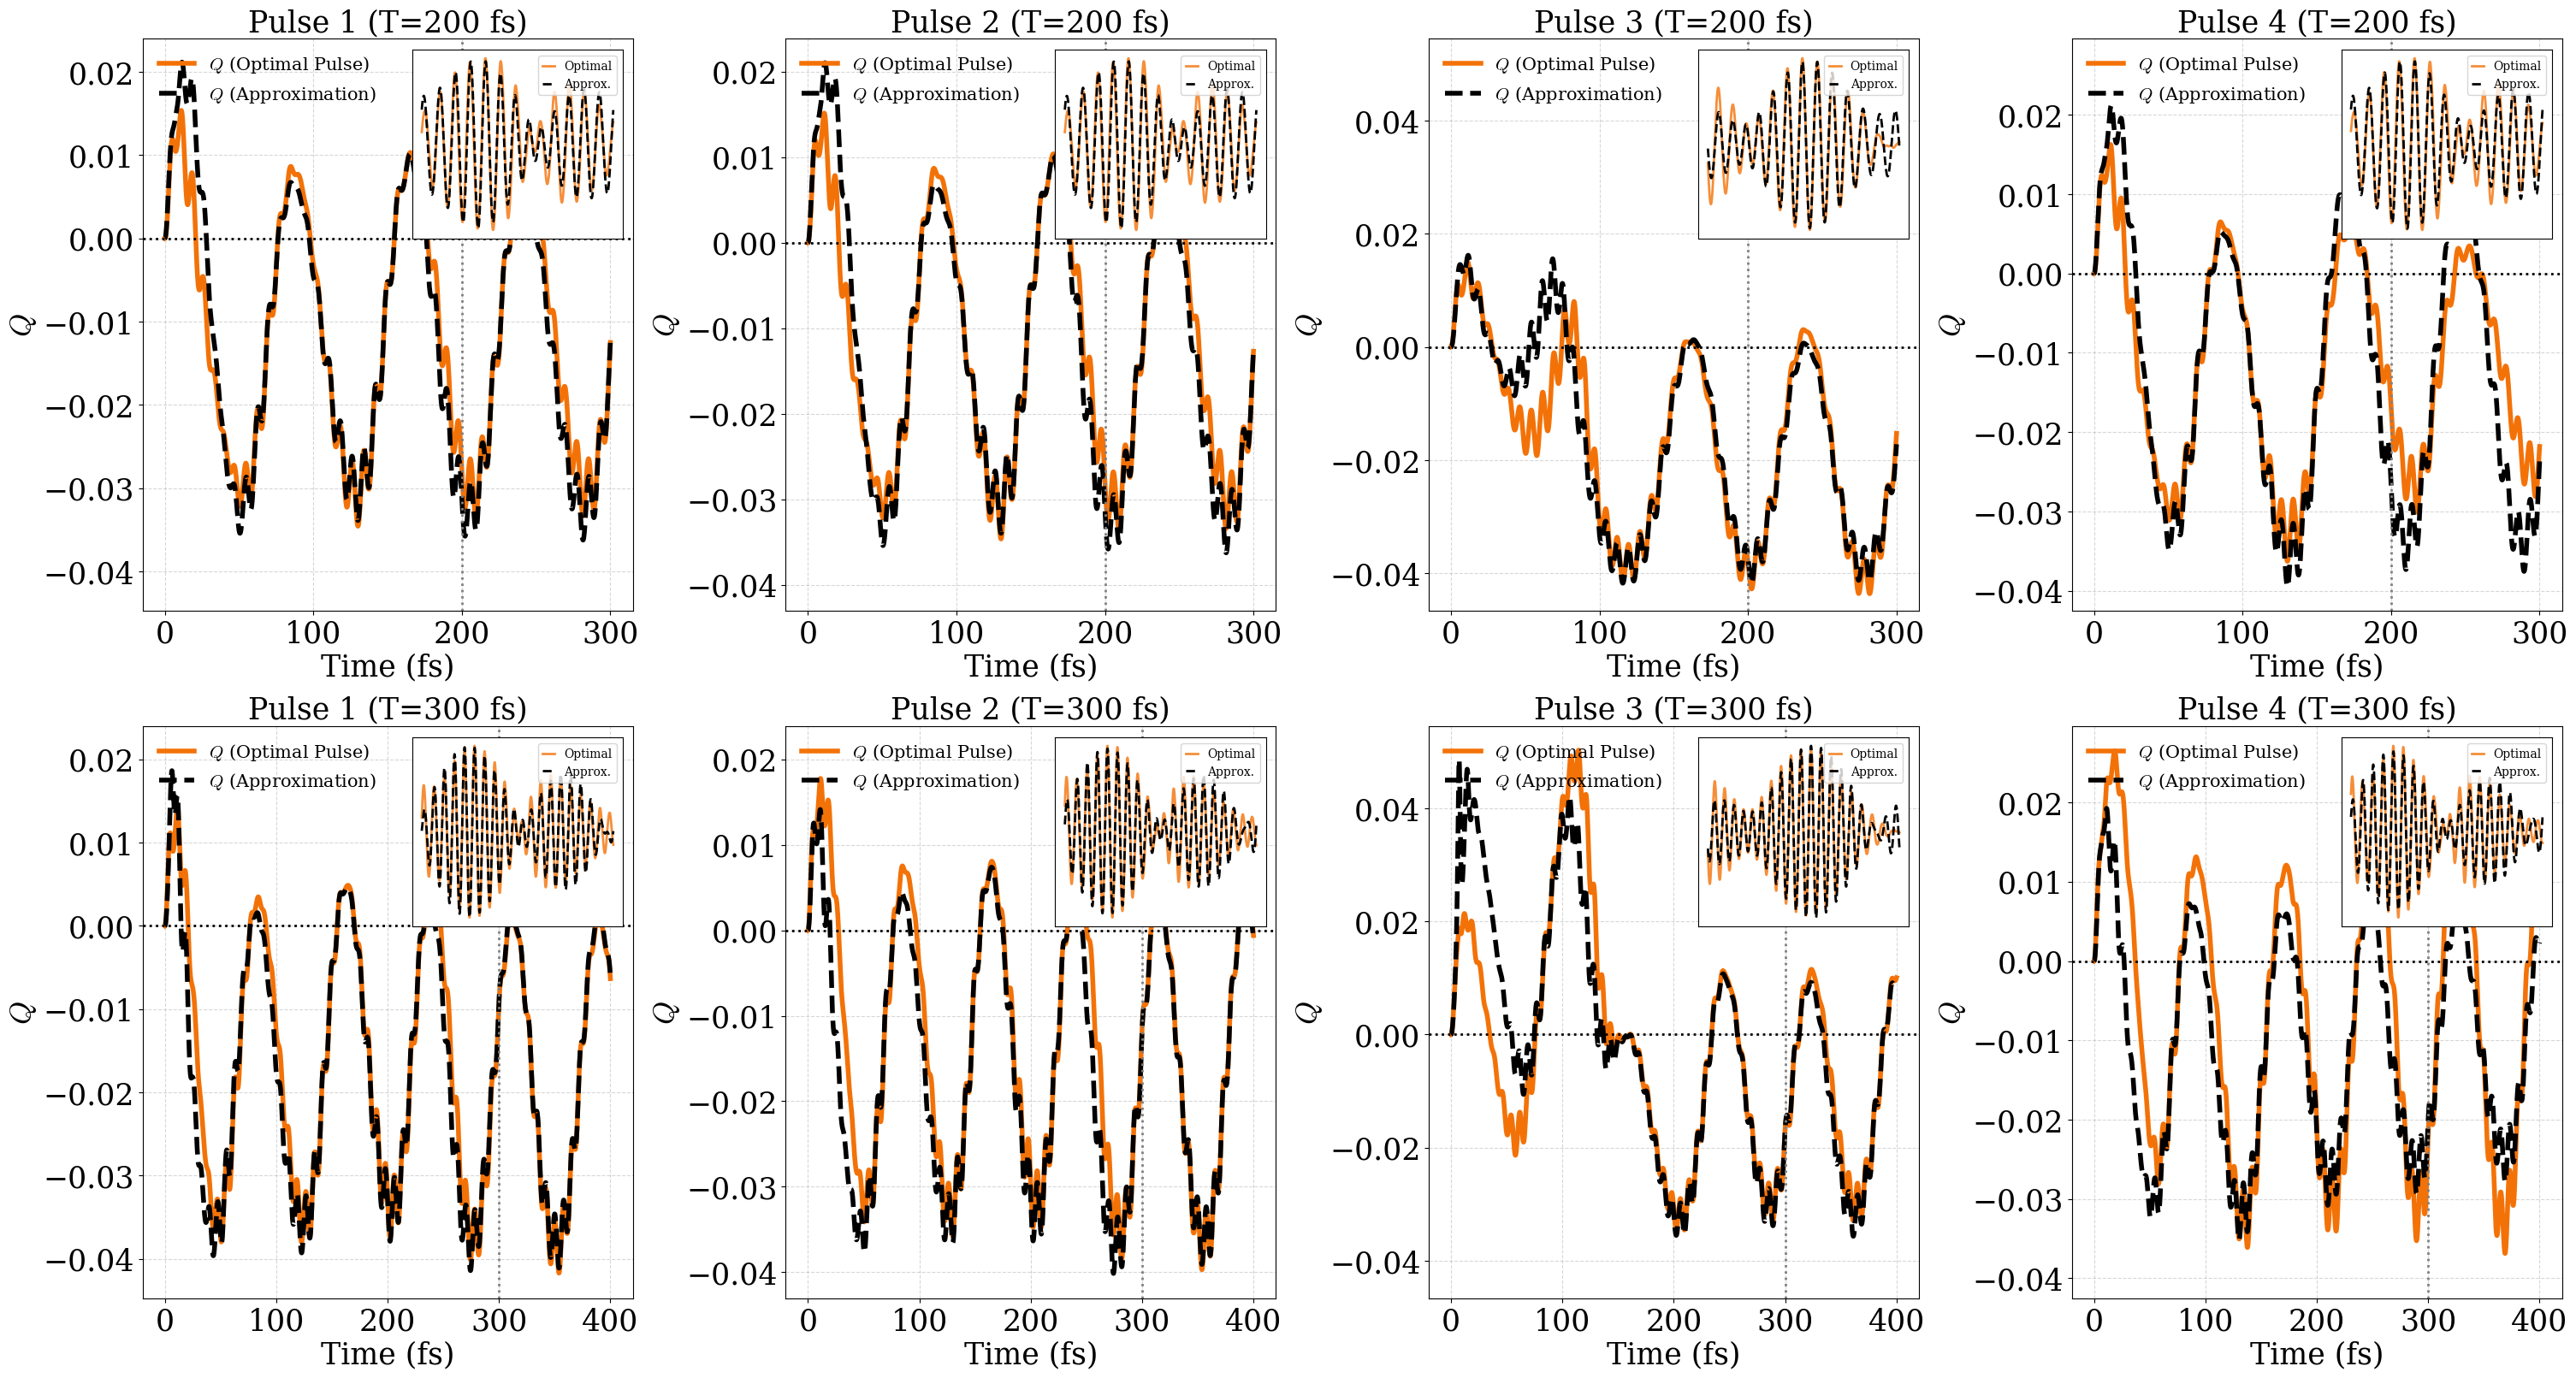

Gráfico generado correctamente.


In [ ]:
# ==============================================================================
# 1. Configuración de Estilo Global (Estilo Póster + MathText)
# ==============================================================================

# Tamaño base (Gigante para póster)
size = 25 

params = {
    'axes.labelsize': size,
    'axes.titlesize': size,
    'xtick.labelsize': size,
    'ytick.labelsize': size,
    'legend.fontsize': size - 10,
    
    # --- CAMBIO CLAVE AQUÍ ---
    'text.usetex': False,          # Desactivamos LaTeX externo para evitar el error
    'font.family': 'serif',        # Usamos fuente con serifa (tipo Times/Computer Modern)
    'mathtext.fontset': 'cm'       # 'cm' = Computer Modern (la fuente de LaTeX)
}

plt.rcParams.update(params)

# ==============================================================================
# 2. Creación de la Cuadrícula de Gráficos 2x4
# ==============================================================================

print("Generando gráfico (usando motor interno)...")

fig, axes = plt.subplots(
    nrows=2, 
    ncols=4, 
    figsize=(30, 16), 
    constrained_layout=True
)

axes_flat = axes.flatten()

for i in range(len(axes_flat)):
    ax = axes_flat[i]
    
    # Verificamos si existe el dato en la lista
    if i < len(results_list):
        res = results_list[i]
        
        # --- Gráfico Principal ---
        ax.plot(
            res['t_sim'], 
            res['Q_original'], 
            label=r'$Q$ (Optimal Pulse)', # La r'' permite usar matemáticas sin error
            color="#e28030",
            linewidth=4
        )
        ax.plot(
            res['t_sim'], 
            res['Q_fit'], 
            label=r'$Q$ (Approximation)', 
            color="#000000", 
            linestyle='--',
            linewidth=4
        )
        
        # Líneas de referencia
        ax.axhline(y=0, color='black', linestyle=':', linewidth=2)
        ax.axvline(x=res['t_pulse_end'], color='gray', linestyle=':', linewidth=2)
        
        # Textos 
        ax.set_title(res['label']) 
        ax.set_xlabel(r'Time (fs)') 
        ax.set_ylabel(r'$Q$') 
        
        # Leyenda
        ax.legend(loc='upper left', frameon=False)
        ax.grid(True, which='both', linestyle='--', alpha=0.5)
        
        # --- Gráfico Insertado (Inset) ---
        ax_inset = ax.inset_axes([0.55, 0.65, 0.43, 0.33]) 
        
        ax_inset.plot(
            res['t_pulse_data'], 
            res['y_pulse_original'], 
            label='Optimal',  
            color='#f37208', 
            alpha=0.8, 
            linewidth=2
        )
        ax_inset.plot(
            res['t_pulse_data'], 
            res['y_pulse_fit'], 
            label='Approx.', 
            color='#000000', 
            linestyle='--',
            linewidth=2
        )
        
        # Limpieza del Inset
        ax_inset.set_xticks([])
        ax_inset.set_yticks([])
        ax_inset.set_xlabel('') 
        ax_inset.set_ylabel('') 

        # Fuente más pequeña para el inset
        ax_inset.legend(fontsize=size - 15, loc='upper right', handlelength=1) 
        ax_inset.grid(True, linestyle=':', alpha=0.5)
        
    else:
        # Ocultar ejes vacíos
        ax.axis('off')

# --- Ajustar límites Y por columna ---
for col in range(4):
    min_y, max_y = float('inf'), float('-inf')
    has_data = False
    
    # 1. Buscar límites
    for row in range(2):
        idx = row * 4 + col
        if idx < len(results_list):
            ax = axes[row, col]
            ylim = ax.get_ylim()
            min_y = min(min_y, ylim[0])
            max_y = max(max_y, ylim[1])
            has_data = True
            
    # 2. Aplicar límites
    if has_data:
        for row in range(2):
            idx = row * 4 + col
            if idx < len(results_list):
                axes[row, col].set_ylim(min_y, max_y)

# Guardar
print("Guardando imagen...")
fig.savefig("poster_quost_results_internal_tex.png", dpi=300, bbox_inches='tight')
plt.show()
print("Gráfico generado correctamente.")